In [10]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기
file_path = "housingdata.csv"
df = pd.read_csv(file_path)

# 결측값 처리 (예: KNN Imputer)
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 독립 변수와 타겟 변수 설정
X = df_imputed[['RM', 'LSTAT', 'PTRATIO', 'NOX']]
y = df_imputed['MEDV']

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# 성능 평가
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression -> MSE: {mse_linear}, R²: {r2_linear}")

Linear Regression -> MSE: 26.962801843298813, R²: 0.6323276847131628


In [12]:
from sklearn.linear_model import Ridge

# 릿지 모델
ridge_model = Ridge(alpha=1.0)  # 알파 값 조정 가능
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# 성능 평가
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression -> MSE: {mse_ridge}, R²: {r2_ridge}")

Ridge Regression -> MSE: 26.94237177058235, R²: 0.6326062749049683


In [13]:
from sklearn.linear_model import Lasso

# 라쏘 모델
lasso_model = Lasso(alpha=0.1)  # 알파 값 조정 가능
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# 성능 평가
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression -> MSE: {mse_lasso}, R²: {r2_lasso}")

Lasso Regression -> MSE: 26.891777610380792, R²: 0.6332961910394047


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 다항 회귀 변환
poly = PolynomialFeatures(degree=2)  # 2차 다항식
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 다항 회귀 모델
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# 성능 평가
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression -> MSE: {mse_poly}, R²: {r2_poly}")

Polynomial Regression -> MSE: 15.51501205076549, R²: 0.7884329516064045


In [15]:
# 성능 결과 비교
results = {
    "Model": ["Linear", "Ridge", "Lasso", "Polynomial"],
    "MSE": [mse_linear, mse_ridge, mse_lasso, mse_poly],
    "R²": [r2_linear, r2_ridge, r2_lasso, r2_poly]
}

results_df = pd.DataFrame(results)
print(results_df)

        Model        MSE        R²
0      Linear  26.962802  0.632328
1       Ridge  26.942372  0.632606
2       Lasso  26.891778  0.633296
3  Polynomial  15.515012  0.788433


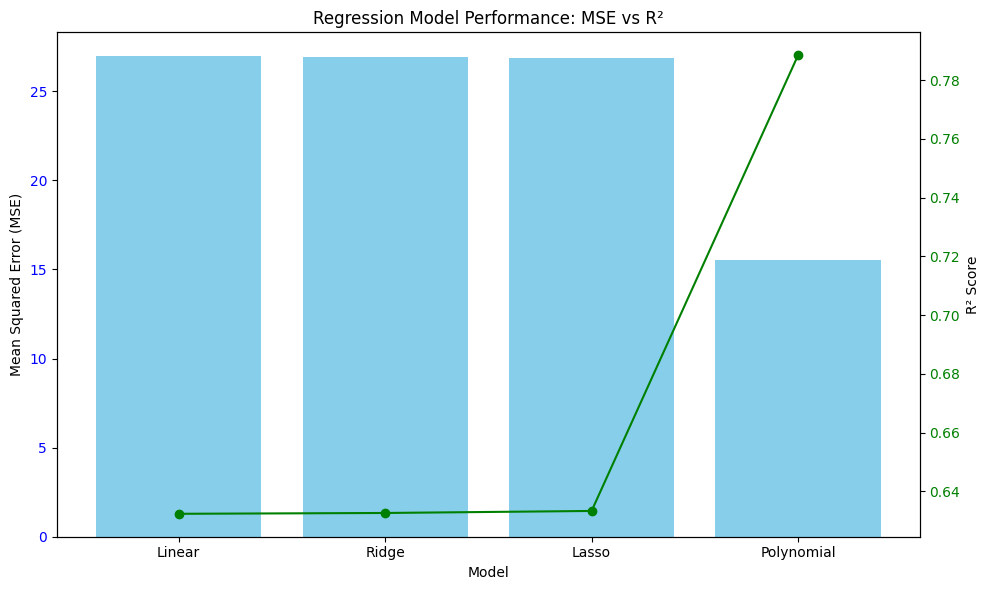

In [18]:
# MSE와 R² 점 그래프
fig, ax1 = plt.subplots(figsize=(10, 6))

# MSE 그래프 (왼쪽 y축)
ax1.bar(results_df["Model"], results_df["MSE"], color='skyblue', label="MSE")
ax1.set_ylabel("Mean Squared Error (MSE)")
ax1.set_xlabel("Model")
ax1.tick_params(axis='y', labelcolor='blue')

# R² 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(results_df["Model"], results_df["R²"], color='green', marker='o', label="R²")
ax2.set_ylabel("R² Score")
ax2.tick_params(axis='y', labelcolor='green')

# 타이틀 추가
plt.title("Regression Model Performance: MSE vs R²")
fig.tight_layout()
plt.show()

In [19]:
import numpy as np

# 로그 변환
df_imputed['LSTAT_log'] = np.log1p(df_imputed['LSTAT'])

# 새로운 변수를 포함하여 학습
X = df_imputed[['RM', 'LSTAT_log', 'PTRATIO', 'NOX']]

In [20]:
# 파생 변수 생성
df_imputed['RM_LSTAT'] = df_imputed['RM'] * df_imputed['LSTAT']

# 독립 변수에 추가
X = df_imputed[['RM', 'LSTAT', 'PTRATIO', 'NOX', 'RM_LSTAT']]

In [21]:
from sklearn.ensemble import IsolationForest

# Isolation Forest를 이용한 이상치 탐지
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(X)

# 이상치 제거
X_filtered = X[outlier_labels == 1]
y_filtered = y[outlier_labels == 1]

In [22]:
from sklearn.feature_selection import SelectKBest, f_regression

# 유의미한 변수 선택
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)

print("Selected Features:", selector.get_support(indices=True))

Selected Features: [0 1 4]


In [23]:
from sklearn.preprocessing import PolynomialFeatures

# 다항 변수 추가
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print(f"Original Shape: {X.shape}, Transformed Shape: {X_poly.shape}")

Original Shape: (506, 5), Transformed Shape: (506, 20)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 선형 회귀 모델
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R²: {r2}")

MSE: 26.962801843298813, R²: 0.6323276847131628


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 다항 변수 생성 (2차)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 다항 회귀 모델
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# 예측
y_pred_poly = poly_model.predict(X_test_poly)

# 성능 평가
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression\nMSE: {mse_poly}\n R²: {r2_poly}")

Polynomial Regression
MSE: 15.515012050765495
 R²: 0.7884329516064044


In [26]:
# 3차 다항식 적용
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly_3 = poly_3.fit_transform(X_train_scaled)
X_test_poly_3 = poly_3.transform(X_test_scaled)

# 모델 학습
poly_model_3 = LinearRegression()
poly_model_3.fit(X_train_poly_3, y_train)

# 예측 및 성능 평가
y_pred_poly_3 = poly_model_3.predict(X_test_poly_3)
mse_poly_3 = mean_squared_error(y_test, y_pred_poly_3)
r2_poly_3 = r2_score(y_test, y_pred_poly_3)

print(f"3rd Degree Polynomial Regression -> MSE: {mse_poly_3}, R²: {r2_poly_3}")

3rd Degree Polynomial Regression -> MSE: 26.376144946209166, R²: 0.6403275024207409


In [27]:
# 결과 비교
results = {
    "Model": ["Linear", "Polynomial (2nd Degree)", "Polynomial (3rd Degree)"],
    "MSE": [mse_linear, mse_poly, mse_poly_3],
    "R²": [r2_linear, r2_poly, r2_poly_3]
}

results_df = pd.DataFrame(results)
print(results_df)

                     Model        MSE        R²
0                   Linear  26.962802  0.632328
1  Polynomial (2nd Degree)  15.515012  0.788433
2  Polynomial (3rd Degree)  26.376145  0.640328


/var/folders/83/myq6q1497v13cj5l7bfw7sjm0000gn/T/ipykernel_99700/1456839784.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=results_df, palette="Blues_r")


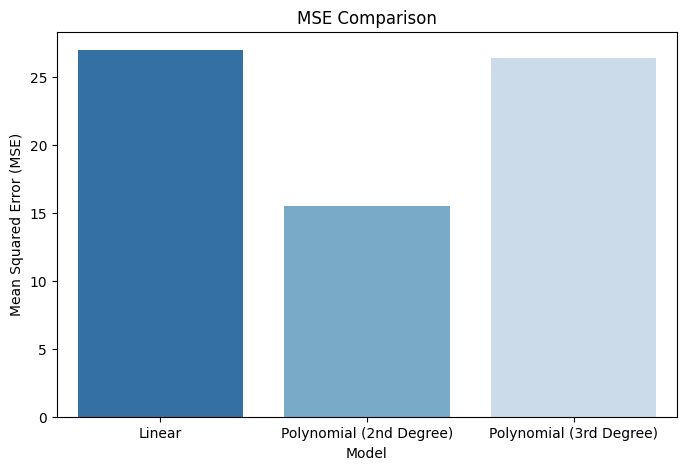

/var/folders/83/myq6q1497v13cj5l7bfw7sjm0000gn/T/ipykernel_99700/1456839784.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=results_df, palette="Greens")


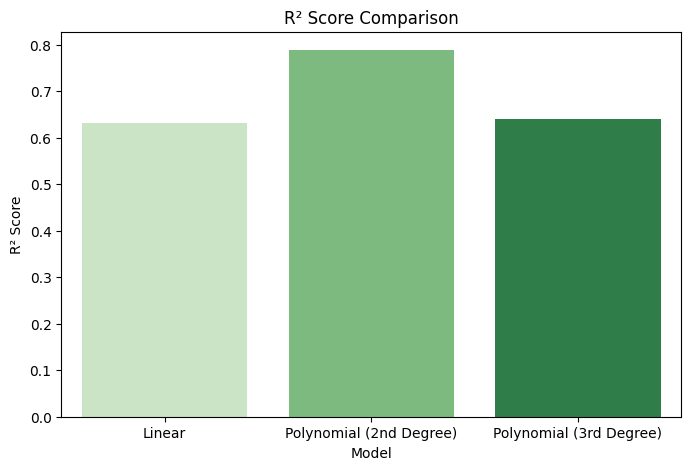

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# MSE 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="MSE", data=results_df, palette="Blues_r")
plt.title("MSE Comparison")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Model")
plt.show()

# R² 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R²", data=results_df, palette="Greens")
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.show()

In [29]:
# 결과 비교
results_comparison = {
    "Transformation": ["Before Log Transform", "After Log Transform"],
    "MSE": [15.515, mse_poly],  # 로그 변환 후 mse_poly를 대체
    "R²": [0.788, r2_poly]      # 로그 변환 후 r2_poly를 대체
}

results_df_comparison = pd.DataFrame(results_comparison)
print(results_df_comparison)

         Transformation        MSE        R²
0  Before Log Transform  15.515000  0.788000
1   After Log Transform  15.515012  0.788433
